In [1101]:
import pandas as pd

In [1102]:
import matplotlib.pyplot as plt

In [1103]:
YEAR = 2021
SEASON = 0   #   0 : spring     1 : summer    2 : fall    3 : winter
DAY = 0   # 0 : weekday       1 : weekend

In [1104]:
demand = pd.read_csv("한국전력거래소_시간별 전력수요량_20211231.csv", encoding='CP949',index_col = '날짜', dayfirst=False,parse_dates=True)

In [1105]:
name = {}
for i in range(24):
    name['{}시'.format(i+1)] = i+1

demand = demand.rename(
    columns = name
)

In [1106]:
demand

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
날짜,,,,,,,,,,,,,,,,,,,,,
2021-01-01,64942,62593,60905,59889,59638,59936,60193,59982,59626,57904,...,56691,58299,60425,62931,64176,63645,62754,61561,61979,63055
2021-01-02,60658,58603,57309,56663,56733,57327,58378,59285,60669,59515,...,55493,57865,61407,64223,65082,64257,62981,61686,61962,64227
2021-01-03,61992,59723,58310,57599,57518,58073,58877,59373,59434,56835,...,59465,61355,63202,65426,66473,65646,64815,63289,63706,64480
2021-01-04,62078,60011,58936,58715,59233,61081,64908,71659,80766,82796,...,81315,81431,82840,81666,78838,75717,72867,69726,68460,70327
2021-01-05,67267,64957,63471,63136,63564,65045,68221,73685,81609,83240,...,81611,82647,84497,83721,81513,78460,75423,72053,70992,72838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,87590,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,88717,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,85966,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882


In [1107]:
demand.index[0].dayofweek

4

In [1108]:
renewable = pd.read_csv("한국전력거래소_시간별 신재생에너지 거래량_20220331.csv", encoding='CP949',index_col = 0 ,parse_dates=True)

In [1109]:
renewable['태양광+풍력'] = renewable['태양광']*3+renewable['풍력']

In [1110]:
renewable = renewable.loc[renewable.index<='2021-12-31',['거래시간','태양광+풍력']]

In [1111]:
renewable

,거래시간,태양광+풍력
거래일,,
2021-01-01,1,725.632045
2021-01-01,2,695.719085
2021-01-01,3,702.783622
2021-01-01,4,668.804108
2021-01-01,5,615.451071
...,...,...
2021-12-31,20,2805.156738
2021-12-31,21,2271.464311
2021-12-31,22,1559.837092


In [1112]:
a = renewable.sort_index().groupby(["거래시간"]).head(365)
type(a)

pandas.core.frame.DataFrame

In [1113]:
final_renewable = a.pivot(columns = '거래시간', values = "태양광+풍력")

In [1114]:
dm_2021 = demand + final_renewable

In [1115]:
dm = [] #연도별, 계절별, 주말/평일별 수요 Table 저장
for year in range(2021,2035):
    final_dm = dm_2021 + dm_2021*((554798/517756)-1)*(year-2021)/13    #수요 증가 적용
    dm.append(
        [
            #weekday
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek<5)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek<5)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek<5)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek<5)]#winter
            ],
            #weekend
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek>4)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek>4)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek>4)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek>4)]#winter
            ]
        ]
    )

<AxesSubplot:title={'center':'2021 demand graph'}, xlabel='Time'>

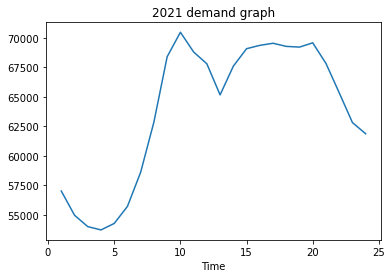

In [1117]:
dm[YEAR-2021][DAY][SEASON].mean().plot(xlabel ='Time', title ='{} demand graph'.format(YEAR) )

In [1118]:
supply = pd.read_csv("한국전력거래소_연료원별 전력거래량_20201231.csv",encoding='CP949',index_col = 0, dayfirst=False, parse_dates=True)

In [1119]:
sup_dict = {
    "nuc" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='원자력')],
    "soft_coal" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='유연탄')],
    "hard_coal" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='무연탄')],
    "biogas" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='바이오가스')],
    "subgas" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='부생가스')],
    "solar" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='태양광')],
    "wind" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='풍력')],
    "small" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='소수력')],
    "hydro" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='수력')],
    "pump" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='양수')],
    "land" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='매립가스')],
    "bunker" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='중유')],
    "waste" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='폐기물')],
    "lng" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='LNG')],
    "fuelcell" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='연료전지')],
    "diesel" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='경유')],
    "gaspressure" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='가스압')],
    "ocean" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='해양에너지')],
    "biomass" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='바이오매스')],
    "etc" : supply[(supply.index>'2019-12-31')&(supply['연료원']=='기타')]
}
sup_list = ['nuc', 'soft_coal', 'hard_coal', 'biogas', 'subgas', 'solar', 'wind', \
            'small', 'hydro', 'pump', 'land', 'bunker'\
           , 'waste', 'lng', 'fuelcell', 'diesel', 'gaspressure', 'ocean', 'biomass', 'etc']
# sup_index = 

# coal = hard_coal.add(soft_coal)
# coal['거래시간'] = (coal['거래시간']/2).astype(int)
# coal['연료원'] = 'coal'

In [1120]:
for key in sup_dict.keys():
    temp = sup_dict[key].sort_index().groupby(["거래시간"]).head(365)
    sup_dict[key] = temp.pivot(columns = '거래시간', values = "전력거래량(MWh)")

In [1121]:
sup_dict['solar']*=3 # 여기서 *3 은 (ppa + 자가용발전)의 예측값
sup_dict['solar']

거래시간,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일자,,,,,,,,,,,,,,,,,,,,,
2020-01-01,12.477204,10.200300,6.582948,0.874284,1.174008,3.085200,2.060904,7.104393,480.213915,1755.405858,...,2781.900855,1781.299773,736.081761,661.555476,895.683294,948.295680,617.930142,245.456046,59.047932,11.315202
2020-01-02,10.430460,4.309152,0.671376,0.020568,1.174308,3.078732,1.853472,6.660774,404.300595,1592.017920,...,2595.878802,1593.775674,621.218406,590.550273,871.045989,829.197003,607.236168,254.416698,75.199260,17.188074
2020-01-03,10.598004,7.966968,4.783584,0.234000,1.173360,3.102324,1.869000,6.843387,529.125903,1919.086764,...,4092.031287,2692.681128,986.324187,764.644074,1188.177408,1161.044982,845.663298,392.602893,101.007219,36.794319
2020-01-04,12.821148,8.108652,4.682088,0.696216,1.374216,3.103092,1.763400,7.638129,533.989797,1914.746271,...,4220.191713,2893.518765,1011.365451,768.473820,1204.852998,1167.619689,837.410895,391.527798,98.135508,34.166466
2020-01-05,11.790408,7.162956,4.900260,1.228920,1.173672,3.055740,1.815162,8.560182,696.166458,2909.126415,...,3703.155570,2107.658796,760.837497,751.819566,1195.137099,1166.978961,878.229012,407.371950,106.105851,40.220640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,21.517770,11.137428,7.380024,2.446035,2.146083,1.444248,0.135747,12.194151,770.800887,2774.648427,...,3961.920051,2771.892030,1173.804402,2141.933097,2518.187610,2348.064720,1434.336036,517.851090,157.985262,40.549236
2020-12-27,11.414787,7.261245,7.396005,4.591593,2.573730,1.910724,0.117696,4.866318,426.618264,1626.151275,...,1221.176865,675.164424,372.145134,937.309614,812.248215,709.210536,348.765699,121.776120,48.116184,20.559714
2020-12-28,3.472068,0.543072,2.572125,0.235431,0.017400,0.010344,0.007104,8.908104,644.433537,2564.973201,...,5053.982898,3555.562845,1421.494116,2221.640022,2729.213649,2645.640309,1744.076577,769.129272,283.151532,65.312109


In [1122]:
#공급 증가율 적용
rate = {}
for key in sup_list:
    if (key == 'soft_coal') or (key == 'hard_coal'):
        rate[key] = 28.3/35.3
    elif key == 'lng':
        rate[key] = 59.1/41.3
    elif key == 'solar':
        rate[key] = 10.8/3.7 
    elif key == 'pump':
        rate[key] = 6.5/4.7
    else:
        rate[key] = 1

In [1134]:
fin_sup=[]

for year in range(2021,2035):
    i = year-2021
    fin_sup.append([  [ [],[],[],[] ], [ [],[],[],[] ]  ])
    for key in sup_dict.keys(): 
        x = sup_dict[key] + sup_dict[key]*(rate[key]-1)*(year-2020)/14 #연도별 공급증가율 적용
        #weekday                
        fin_sup[i][0][0].append(x[((x.index>='2020-03-01')&(x.index<'2020-06-01'))&(x.index.dayofweek<5)].mean())#spring
        fin_sup[i][0][1].append(x[((x.index>='2020-06-01')&(x.index<'2020-09-01'))&(x.index.dayofweek<5)].mean())#summer
        fin_sup[i][0][2].append(x[((x.index>='2020-09-01')&(x.index<'2020-12-01'))&(x.index.dayofweek<5)].mean())#fall
        fin_sup[i][0][3].append(x[((x.index<'2020-03-01')|('2020-11-30'<x.index))&(x.index.dayofweek<5)].mean())#winter                
        #weekend                
        fin_sup[i][1][0].append(x[((x.index>='2020-03-01')&(x.index<'2020-06-01'))&(x.index.dayofweek>4)].mean())#spring
        fin_sup[i][1][1].append(x[((x.index>='2020-06-01')&(x.index<'2020-09-01'))&(x.index.dayofweek>4)].mean())#summer
        fin_sup[i][1][2].append(x[((x.index>='2020-09-01')&(x.index<'2020-12-01'))&(x.index.dayofweek>4)].mean())#fall
        fin_sup[i][1][3].append(x[((x.index<'2020-03-01')|('2020-11-30'<x.index))&(x.index.dayofweek>4)].mean())#winter
    

In [1137]:
YEAR = 2034

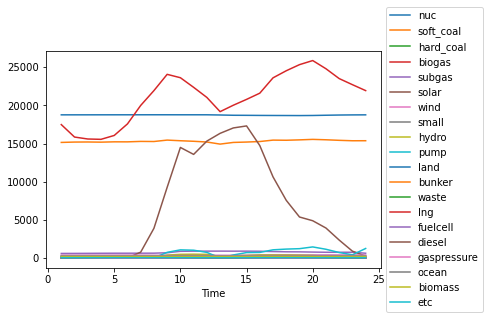

In [1138]:
b = pd.DataFrame(fin_sup[YEAR-2021][DAY][SEASON])
g = b.T

sup_column = {}
for i, source in enumerate(sup_list):
    sup_column[i] = source

g = g.rename(columns = sup_column)
g.plot(xlabel = 'Time').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [1139]:
YEAR

2034

Text(0, 0.5, 'supply')

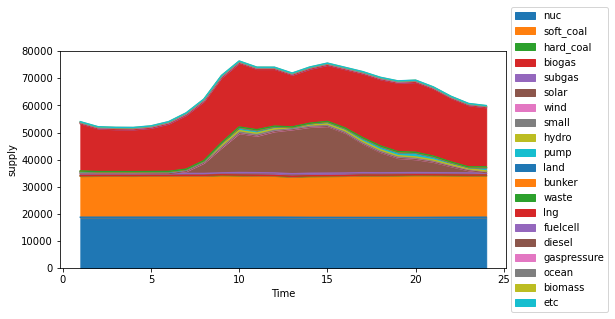

In [1140]:
fig, axs = plt.subplots(figsize=(8, 4))
g.plot.area(ax=axs, xlabel = 'Time').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axs.set_ylabel("supply")

<AxesSubplot:xlabel='time'>

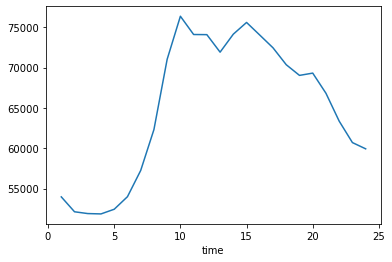

In [1144]:
sup_sum = fin_sup[YEAR-2021][DAY][SEASON][0]
for i in range(1,len(fin_sup[YEAR-2021][DAY][SEASON])):
    sup_sum = sup_sum + fin_sup[YEAR-2021][DAY][SEASON][i]
sup_sum.plot(xlabel = 'time')

In [1145]:
dm[YEAR-2021][DAY][SEASON].mean()-sup_sum

1     7118.443323
2     6764.428091
3     5950.427335
4     5693.439310
5     5702.920940
6     5700.418339
7     5565.966770
8     5063.836267
9     2283.515015
10    -819.581341
11    -350.848079
12   -1410.122423
13   -2067.516453
14   -1688.848263
15   -1547.471372
16     321.322449
17    2090.793953
18    3902.943300
19    5157.199412
20    5263.582923
21    5889.929445
22    6675.973087
23    6619.595597
24    6375.376004
dtype: float64

In [828]:
summation.mean()

62724.96769224983